# Deep Learning

# I. Overview

The main objective of this assignment is to learn and implement Deep Neural Network models using TensorFlow on the bank marketing dataset and predict whether the client subscribed to the term deposit that was marketed by the bank. The dataset contains several features like the details about the customer and the previous campaign details for them. Based on the features available in the dataset, several different models are implemented and analyzed to determine the best classification model for the dataset.

In the first part of the assignment, preprocessing and data visualization is performed to understand the relationships among different columns and find observations that can be utilized for the next part.

In the second part of this assignment, the preprocessed dataset is applied to the different Neural Network models to predict the accurate results for the outcome of the marketing campaign. To apply the neural network models, the data is split into training and test data. After applying each Neural Network model, the accuracy and loss metrics will be analyzed and visualized to understand its performance.

# II. Data

## Classification Dataset
### Bank Marketing Campaign

This dataset is provided by Laureano and Cortez's research which was focused on targeting the bank telemarketing phone calls to sell longterm deposits to the clients. In this campaign, the human agents executed phone calls to the list of clients for selling the deposit or if meanwhile the client called the call center for some other purpose and was asked to subscribe to the deposit. This resulted in a binary result, whether it was successful or unsuccessful. This study contains the real data collected from a Portuguese retail bank, from May 2008 to June 2013, totaling 52,944 phone contacts.

The dataset provides several input variables to create a classification model to determine whether the client has subscribed to the term deposit or not. The variables provided in the dataset contains information about the client as well as the campaign outcomes to better classify the target outcome.


#### Below is the information provided in the dataset:

- age
- job type
- marital status
- education
- default - Has credit in default?
- balance: Average yearly balance (€uros)
- housing - Has a housing loan?
- loan - Has a personal loan?
- contact - Communication type
- day - Last contact day of the month
- month - Last contact month of the year
- duration - Last contact duration (in seconds)
- campaign - Number of contacts performed during this campaign for that particular client
- pdays - Number of days that passed by after the client was last contacted from a previous campaign
    - -1 means that the client was not previously contacted
- previous - Number of contacts performed before this campaign for that particular client
- poutcome - Outcome of the previous marketing campaign
- y - Binary evaluation of whether the client subscribed to a term deposit?

The dataset contains a total of 17 columns and 45,211 records. With the help of all the details provided from the dataset, I will try to gain insights from the data through a cycle of preprocessing, visualization, and finally applying classification algorithm to predict whether the client will subscribe to the term deposit or not.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('marketing_data/bank-full.csv', delimiter=";")
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
data.shape

(45211, 17)

In [5]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

### Check for Null values

In [6]:
data.isnull().any(axis=1).sum()

0

#### The dataset does not have any null values.

### Check for duplicates

In [7]:
data.duplicated().sum()

0

In [8]:
data.duplicated().any()

False

There are no duplicates observed in the dataset

In [9]:
def get_sorted(mydict):
    ''' Method to print out sorted dictionary '''
    for key in sorted(mydict):
        print(key, mydict[key])

### Sampling 10,000 rows from the dataset

In [10]:
data.shape

(45211, 17)

In [11]:
df = data.sample(10000)

### Converting the job column into categorical column

In [12]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

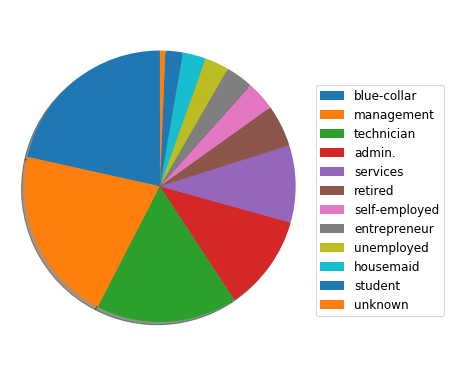

In [13]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data['job'].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data['job'].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

The highest number of customers worked either a blue-collar job, management, technician, or admin.

In [14]:
data['job'] = data['job'].astype('category')
job_dic = dict(zip(data['job'].cat.codes, data['job']))
get_sorted(job_dic)

0 admin.
1 blue-collar
2 entrepreneur
3 housemaid
4 management
5 retired
6 self-employed
7 services
8 student
9 technician
10 unemployed
11 unknown


In [15]:
data['job'] = data['job'].cat.codes

In [16]:
data['job'].head(5)

0     4
1     9
2     2
3     1
4    11
Name: job, dtype: int8

### Converting the marital column into categorical column

In [17]:
data["marital"].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

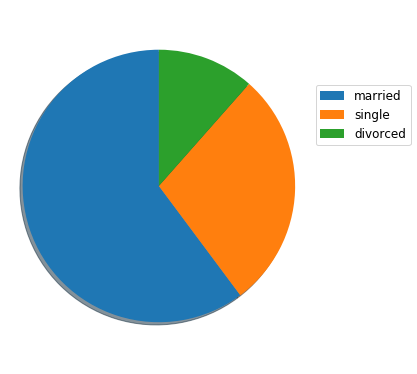

In [18]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data["marital"].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data["marital"].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

Married customers were approached higher than single or divorced customers.

In [19]:
data["marital"] = data["marital"].astype('category')
marital_dic = dict(zip(data["marital"].cat.codes, data["marital"]))
get_sorted(marital_dic)

0 divorced
1 married
2 single


In [20]:
data["marital"] = data["marital"].cat.codes

In [21]:
data["marital"].head(5)

0    1
1    2
2    1
3    1
4    2
Name: marital, dtype: int8

### Converting the education column into categorical column

In [22]:
data["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

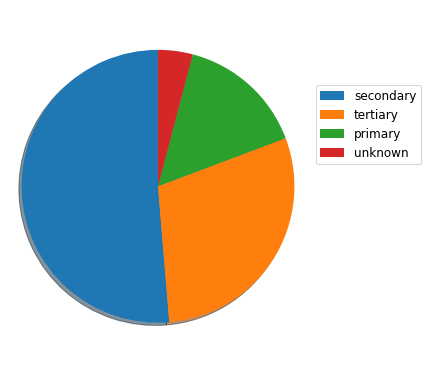

In [23]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data["education"].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data["education"].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

It looks like half of the clients approached had primary education.

In [24]:
data["education"] = data["education"].astype('category')
education_dic = dict(zip(data["education"].cat.codes, data["education"]))
get_sorted(education_dic)

0 primary
1 secondary
2 tertiary
3 unknown


In [25]:
data["education"] = data["education"].cat.codes

In [26]:
data["education"].head(5)

0    2
1    1
2    1
3    3
4    3
Name: education, dtype: int8

### Converting the default column into categorical column

In [27]:
data["default"].value_counts()

no     44396
yes      815
Name: default, dtype: int64

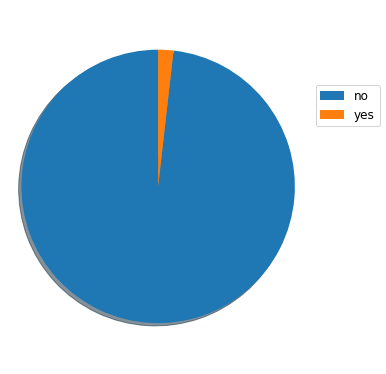

In [28]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data["default"].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data["default"].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

The highest number of approached clients had a credit default.

In [29]:
data["default"] = data["default"].astype('category')
default_dic = dict(zip(data["default"].cat.codes, data["default"]))
get_sorted(default_dic)

0 no
1 yes


In [30]:
data["default"] = data["default"].cat.codes

In [31]:
data["default"].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    0
Name: default, dtype: int8

### Converting the housing column into categorical column

In [32]:
data["housing"].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

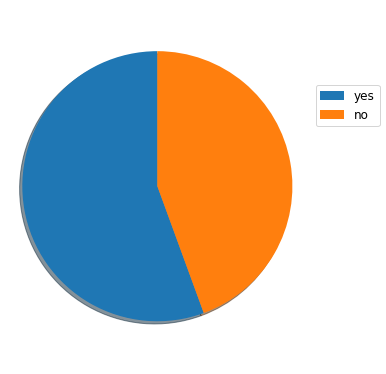

In [33]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data["housing"].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data["housing"].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

More than half of the clients had a housing loan.

In [34]:
data["housing"] = data["housing"].astype('category')
housing_dic = dict(zip(data["housing"].cat.codes, data["housing"]))
get_sorted(housing_dic)

0 no
1 yes


In [35]:
data["housing"] = data["housing"].cat.codes

In [36]:
data["housing"].head(5)

0    1
1    1
2    1
3    1
4    0
Name: housing, dtype: int8

### Converting the loan column into categorical column

In [37]:
data["loan"].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

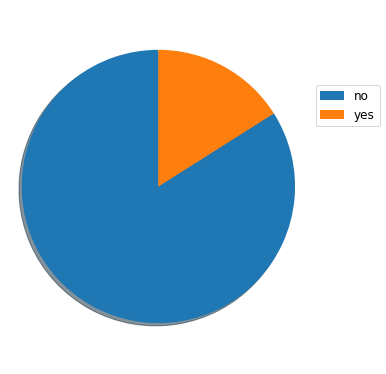

In [38]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data["loan"].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data["loan"].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

Almost 70% of the approached customers had a personal loan.

In [39]:
data["loan"] = data["loan"].astype('category')
loan_dic = dict(zip(data["loan"].cat.codes, data["loan"]))
get_sorted(loan_dic)

0 no
1 yes


In [40]:
data["loan"] = data["loan"].cat.codes

In [41]:
data["loan"].head(5)

0    0
1    0
2    1
3    0
4    0
Name: loan, dtype: int8

### Converting the contact column into categorical column

In [42]:
data["contact"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

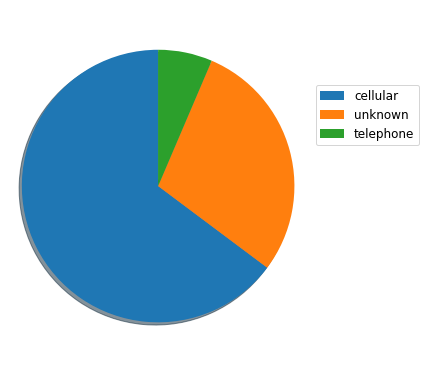

In [43]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data["contact"].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data["contact"].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

The clients were approached higher through their cell phones.

In [44]:
data["contact"] = data["contact"].astype('category')
contact_dic = dict(zip(data["contact"].cat.codes, data["contact"]))
get_sorted(contact_dic)

0 cellular
1 telephone
2 unknown


In [45]:
data["contact"] = data["contact"].cat.codes

In [46]:
data["contact"].head(-10)

0        2
1        2
2        2
3        2
4        2
        ..
45196    0
45197    0
45198    0
45199    0
45200    0
Name: contact, Length: 45201, dtype: int8

### Converting the month column into categorical column

In [47]:
data["month"].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

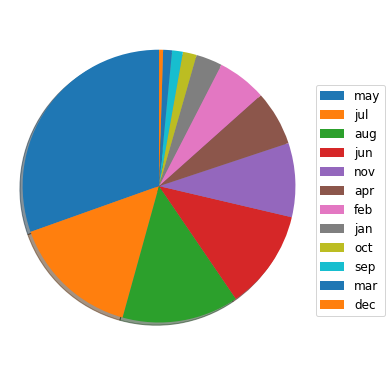

In [48]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data["month"].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data["month"].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

It seems that the marketing campaign was highly active in May, June, July, and August (Summer season).

In [49]:
months = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

#### Changing the months from string to integers

In [50]:
data['month'] = data['month'].apply(lambda x: months[x])

In [51]:
data['month'].value_counts()

5     13766
7      6895
8      6247
6      5341
11     3970
4      2932
2      2649
1      1403
10      738
9       579
3       477
12      214
Name: month, dtype: int64

### Converting the poutcome column into categorical column

In [52]:
data["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

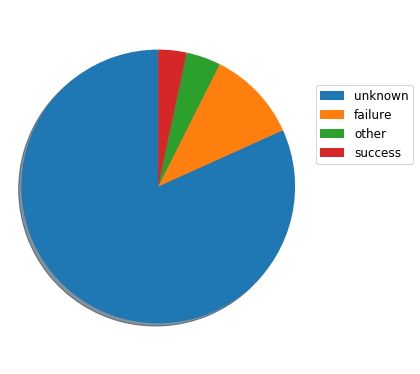

In [53]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data["poutcome"].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data["poutcome"].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

The previous outcome for the marketing for most of the approached customers was unknown. It seems that they approached more to the clients who did not subscribe to last marketing campaign.

In [54]:
data["poutcome"] = data["poutcome"].astype('category')
poutcome_dic = dict(zip(data["poutcome"].cat.codes, data["poutcome"]))
get_sorted(poutcome_dic)

0 failure
1 other
2 success
3 unknown


In [55]:
data["poutcome"] = data["poutcome"].cat.codes

In [56]:
data["poutcome"].head(5)

0    3
1    3
2    3
3    3
4    3
Name: poutcome, dtype: int8

### Converting the target: y column into categorical column

In [57]:
data["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

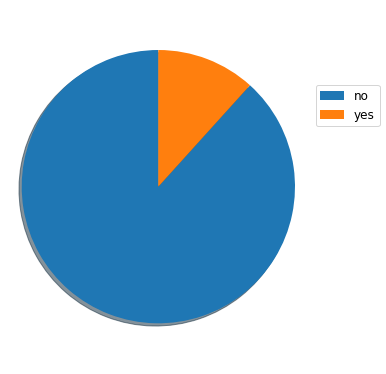

In [58]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data["y"].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data["y"].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

The current marketing campaign seems to have a very less success rate based on the number of customers who chose to subscribe.

In [59]:
data["y"] = data["y"].astype('category')
y_dic = dict(zip(data["y"].cat.codes, data["y"]))
get_sorted(y_dic)

0 no
1 yes


In [60]:
data["y"] = data["y"].cat.codes

In [61]:
data["y"].head(5)

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int8

### Removing the duration column

In the dataset, the author has noted that the duration column highly affects the output target. The author has recommended that the input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. It will highly affect the model in the situation where the duration of the call performed is not known because at the end of the call the result is already known. To achieve the most accurate predictions, I will remove it.

In [62]:
data.shape

(45211, 17)

In [63]:
data.drop('duration', axis=1, inplace=True)

In [64]:
data.shape

(45211, 16)

### Checking the new transformed columns

In [65]:
data.dtypes

age          int64
job           int8
marital       int8
education     int8
default       int8
balance      int64
housing       int8
loan          int8
contact       int8
day          int64
month        int64
campaign     int64
pdays        int64
previous     int64
poutcome      int8
y             int8
dtype: object

#### Now, all the columns have integer datatypes to start observations

In [66]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,5,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,5,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,5,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,5,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,5,1,-1,0,3,0


In [67]:
data.shape

(45211, 16)

## Splitting the dataset into Features and Target

#### Creating a new target dataframe to store the column y

In [68]:
Target = data.iloc[:, -1]
Target

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int8

#### Storing all the other columns into feature dataframe

In [69]:
Features = data.iloc[:, :-1]
Features

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,5,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,5,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,5,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,5,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,5,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,11,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,11,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,11,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,11,4,-1,0,3


## Visualization

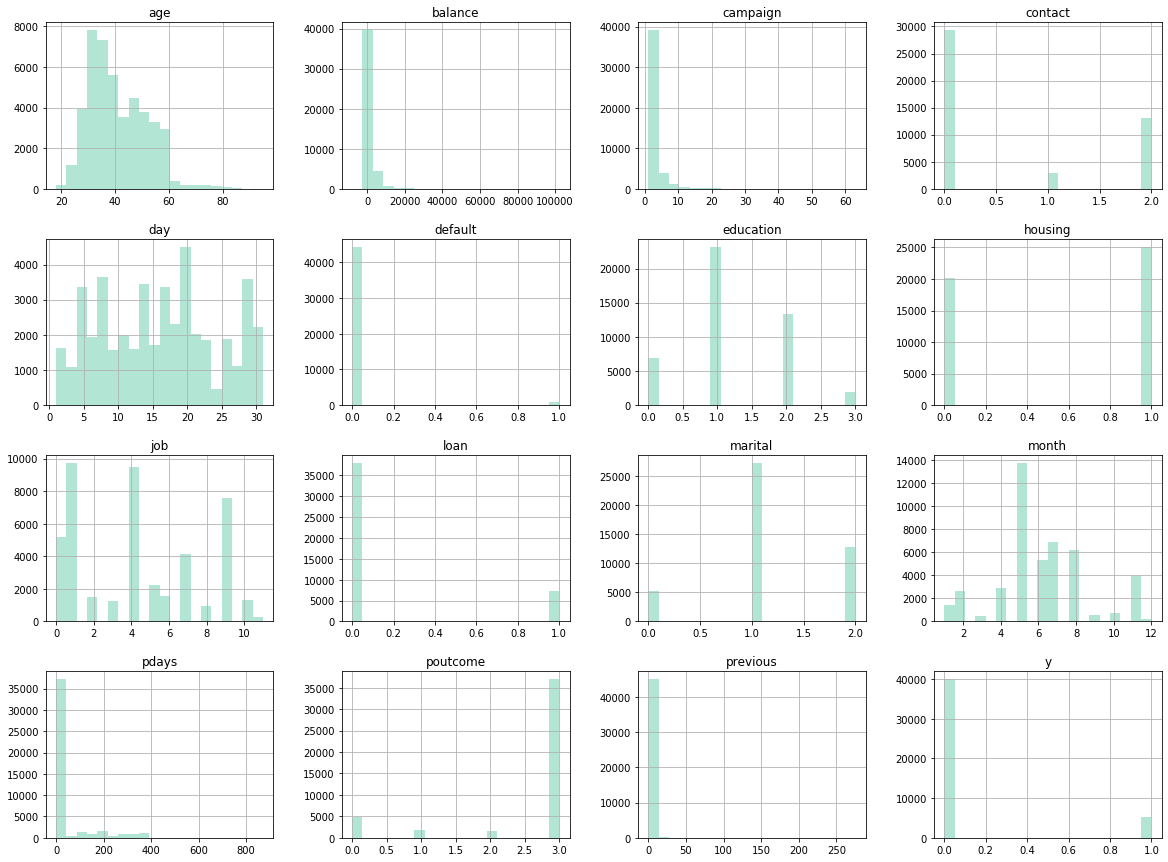

In [70]:
data.hist(color='mediumaquamarine', alpha=0.5, bins=20, figsize=(20, 15))
plt.show()

- From the above histogram plots, it can be seen that the people aged from 30 to 40 are highly targeted for the marketing campaign. 
- Each client was approached at least 1 to 3 times during the marketing campaign.
- Most clients are contacted on their cell phones.
- Most of the clients worked a blue-collar, management, or technician job.
- Most of the clients did not own a loan.
- Most of the clients have attained either secondary or tertiary education.
- Most of the clients own house loans.
- Most clients were married.
- The marketing campaign was highly in action during May month.
- The outcome of the previous campaign was either unknown or failure. There was a very low success rate.
- The outcomes of the campaign has very few success compared to its failure rate.

In [71]:
# Check the original value for the categorical column
# get_sorted(y_dic)

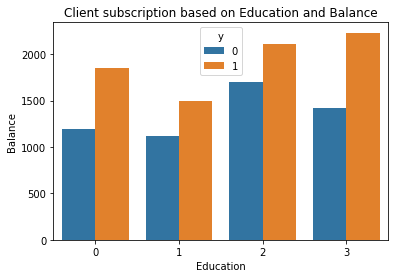

In [72]:
sns.barplot(x='education', y='balance', hue='y', data=data, ci=None)
plt.title('Client subscription based on Education and Balance')
plt.xlabel('Education')
plt.ylabel('Balance')
plt.show()

From the above data, it can be observed that the people who have attained tertiary education have a high yearly average balance are more likely to subscribe to the term deposit. The people who have attained secondary education, and have high yearly average balance are least likely to subscribe when compared to the people who have tertiary education.

In [73]:
data_corr = data.corr()

<Figure size 432x288 with 0 Axes>

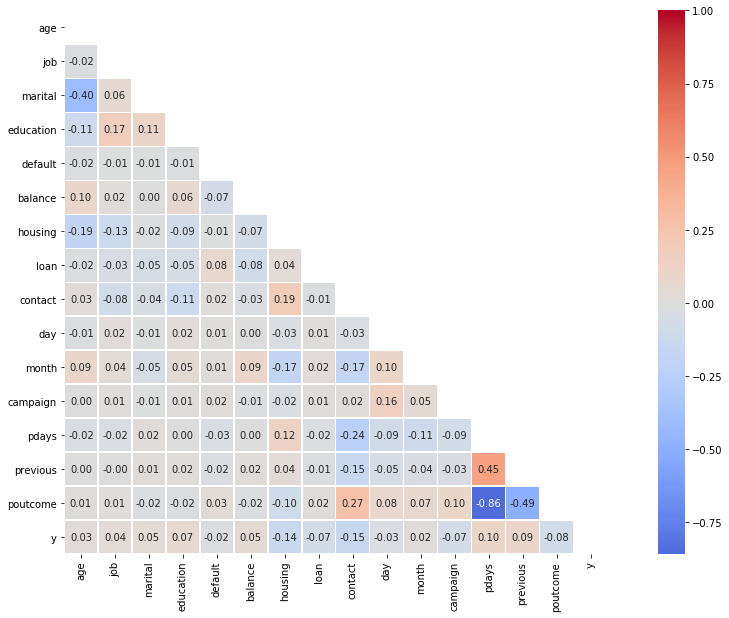

In [74]:
plt.clf()  # Clear previous plt figure
mask = np.triu(np.ones_like(data_corr, dtype=bool))
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(data_corr,
            mask=mask,
            cmap='coolwarm',
            annot=True,
            center=0,
            fmt=".2f",
            square=True,
            linewidths=.5)
plt.show()

From the above correlation matrix, it can be observed that the previous, pdays, education, and balance columns correlate with the final decision of the marketing campaign.

In [75]:
len(data.columns)

16

In [76]:
len(data.columns.values)

16

### Keeping only the columns which were identified to have high correlation

In [77]:
drop_cols = [
    'age', 'default', 'balance', 'day', 'month', 'campaign', 'pdays',
    'previous', 'duration'
]

# Columns with Correlation: 'job', 'marital', 'education',  'housing', 'loan', 'contact', 'poutcome' 'y'
df.drop(drop_cols, inplace=True, axis=1)

In [78]:
import category_encoders as ce

In [79]:
binary_encoder = ce.BinaryEncoder()
df_encoded = binary_encoder.fit_transform(df.iloc[:, :-1])

In [80]:
df_encoded

,job_0,job_1,job_2,job_3,job_4,marital_0,marital_1,marital_2,education_0,education_1,...,housing_0,housing_1,loan_0,loan_1,contact_0,contact_1,contact_2,poutcome_0,poutcome_1,poutcome_2
32129,0,0,0,0,1,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1
42337,0,0,0,1,0,0,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
1718,0,0,0,1,1,0,1,0,0,1,...,0,1,0,1,0,1,0,0,0,1
8122,0,0,1,0,0,0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
7557,0,0,1,0,0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37474,0,0,0,1,0,0,1,1,0,1,...,0,1,0,1,0,0,1,0,1,0
2214,0,0,0,0,1,0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
22113,0,0,0,1,0,0,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
11619,0,0,0,0,1,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1


### Splitting the data into Feature and Target set

In [81]:
X = df_encoded

In [82]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(df.iloc[:, -1:].values.ravel())
y = label_encoder.transform(df.iloc[:, -1:].values.ravel())

### Splitting the data into Training and Test set

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# III. Neural Network Models

Three different sequential deep neural networks are constructed with more than five layers using the TensorFlow library. In all three models, the density of the neurons and activation functions are experimented with to analyze the best working model.

In [84]:
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from sklearn.metrics import recall_score, classification_report, auc, roc_curve, confusion_matrix

## Model 1:
In the below model, the six-layered sequential densely-connected deep neural network model is implemented with a sigmoid activation function. The layer units of the model were selected to be 22 for all the layers and the sigmoid activation function was used to create a model structure like the deep residual network. This structure was selected for experimentation to understand how the model performs when the layers are not changed. The model is compiled with an SGD optimizer and the mean squared error is computed for the loss.

In [85]:
model1 = Sequential([
    Dense(22, input_shape=(X_train.shape[1], ), activation=tf.nn.sigmoid, name="layer1"),
    Dense(22, activation=tf.nn.sigmoid, name="layer2"),
    Dense(22, activation=tf.nn.sigmoid, name="layer3"),
    Dense(22, activation=tf.nn.sigmoid, name="layer4"),
    Dense(22, activation=tf.nn.sigmoid, name="layer5"),
    Dense(2,  activation=tf.nn.sigmoid, name="layer6"),
])

In [86]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 22)                484       
_________________________________________________________________
layer2 (Dense)               (None, 22)                506       
_________________________________________________________________
layer3 (Dense)               (None, 22)                506       
_________________________________________________________________
layer4 (Dense)               (None, 22)                506       
_________________________________________________________________
layer5 (Dense)               (None, 22)                506       
_________________________________________________________________
layer6 (Dense)               (None, 2)                 46        
Total params: 2,554
Trainable params: 2,554
Non-trainable params: 0
______________________________________________________

In [87]:
model1.compile(optimizer='sgd',
               loss='mean_squared_error',
               metrics=['accuracy'])

In [88]:
%%time
model1_history = model1.fit(X_train, y_train, epochs=10, batch_size=1)

Epoch 1/10
8000/8000 [==============================] - 12s 1ms/step - loss: 0.1056 - accuracy: 0.8214
Epoch 2/10
8000/8000 [==============================] - 12s 1ms/step - loss: 0.1035 - accuracy: 0.5254
Epoch 3/10
8000/8000 [==============================] - 11s 1ms/step - loss: 0.1035 - accuracy: 0.5451
Epoch 4/10
8000/8000 [==============================] - 11s 1ms/step - loss: 0.1035 - accuracy: 0.5895
Epoch 5/10
8000/8000 [==============================] - 12s 1ms/step - loss: 0.1034 - accuracy: 0.4608
Epoch 6/10
8000/8000 [==============================] - 12s 1ms/step - loss: 0.1035 - accuracy: 0.6521
Epoch 7/10
8000/8000 [==============================] - 12s 1ms/step - loss: 0.1035 - accuracy: 0.5991
Epoch 8/10
8000/8000 [==============================] - 12s 1ms/step - loss: 0.1035 - accuracy: 0.5562
Epoch 9/10
8000/8000 [==============================] - 12s 1ms/step - loss: 0.1034 - accuracy: 0.5590
Epoch 10/10
8000/8000 [==============================] - 12s 1ms/step - l

### Model accuracy:

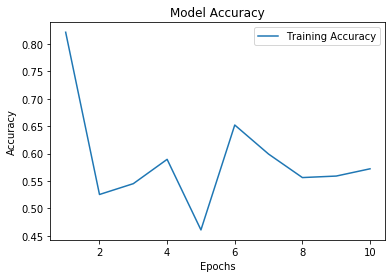

In [89]:
accuray_values = model1_history.history['accuracy']
epochs = range(1, len(accuray_values) + 1)

plt.plot(epochs, accuray_values, label='Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

### Model loss:

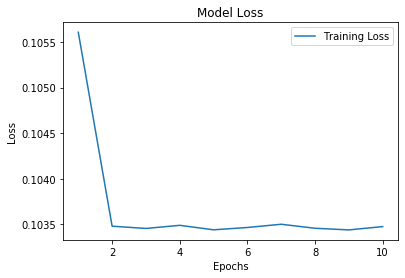

In [90]:
loss_values = model1_history.history['loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [91]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.1014 - accuracy: 0.1520


In [92]:
print(f'Model1 Accuracy: {test_acc}')
print(f'Model1 Loss:     {test_loss}')

Model1 Accuracy: 0.15199999511241913
Model1 Loss:     0.10140137374401093


### Confusion Matrix:

In [93]:
y_pred_model1 = model1.predict(X_test)
y_pred_model1 = np.argmax(y_pred_model1, axis=1)

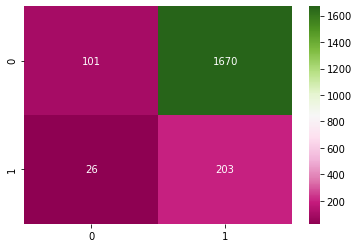

In [94]:
cm_model1 = confusion_matrix(y_test, y_pred_model1)
sns.heatmap(cm_model1, annot=True, cmap="PiYG", fmt='g')

### Results:

The visualization for the model accuracy for each epoch displays that the accuracy for the model incremented sequentially with occasional decrement for some epochs. The model loss dropped after the second epoch and was constant throughout for other epochs.
From the confusion matrix, it can be seen that the model performed well in predicting true positives which was the number of people who rejected the term deposit subscription, and performed fairly well in predicting the true negatives which was the number of people who accepted the subscription.

## Model 2:
In the below model, the seven-layered sequential densely-connected deep neural network model is implemented with a combination of tanh and relu activation functions. The layer units of the model were selected differently from the previous model. The layers are arranged to start from 24 layers than to 12 layers in repeating order. The motivation for selecting the layers in this order was inspired by the deep belief network. This structure was selected for experimentation to understand how the model performs when the units are incremented and decremented for different layers.

In [95]:
model2 = Sequential([
    Dense(24, input_shape=(X_train.shape[1],), activation=tf.nn.tanh, name="layer1"),
    Dense(12, activation=tf.nn.tanh, name="layer2"),
    Dense(24, activation=tf.nn.relu, name="layer3"),
    Dense(12, activation=tf.nn.tanh, name="layer4"),
    Dense(24, activation=tf.nn.relu, name="layer5"),
    Dense(12, activation=tf.nn.tanh, name="layer6"),
    Dense(2,  activation=tf.nn.relu, name="layer7"),
])

In [96]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 24)                528       
_________________________________________________________________
layer2 (Dense)               (None, 12)                300       
_________________________________________________________________
layer3 (Dense)               (None, 24)                312       
_________________________________________________________________
layer4 (Dense)               (None, 12)                300       
_________________________________________________________________
layer5 (Dense)               (None, 24)                312       
_________________________________________________________________
layer6 (Dense)               (None, 12)                300       
_________________________________________________________________
layer7 (Dense)               (None, 2)                

In [97]:
model2.compile(optimizer='sgd',
               loss='mean_squared_error',
               metrics=['accuracy'])

In [98]:
%%time
history_model2 = model2.fit(X_train, y_train, epochs=10)

Epoch 1/10
250/250 [==============================] - 0s 2ms/step - loss: 0.1070 - accuracy: 0.5418
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.0997 - accuracy: 0.5394
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.0981 - accuracy: 0.5480
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.0968 - accuracy: 0.5686
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.0959 - accuracy: 0.5815
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.0951 - accuracy: 0.5885
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.0941 - accuracy: 0.5974
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.0935 - accuracy: 0.6015
Epoch 9/10
250/250 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.6033
Epoch 10/10
250/250 [==============================] - 0s 2ms/step - loss: 0.0922 - accuracy: 0.6168

### Model accuracy:

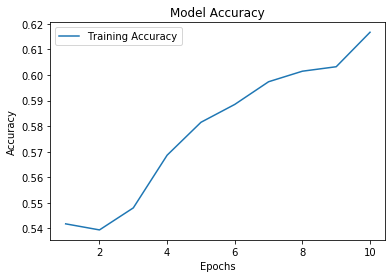

In [99]:
accuray_values = history_model2.history['accuracy']
epochs = range(1, len(accuray_values)+1)

plt.plot(epochs, accuray_values, label='Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

### Model loss:

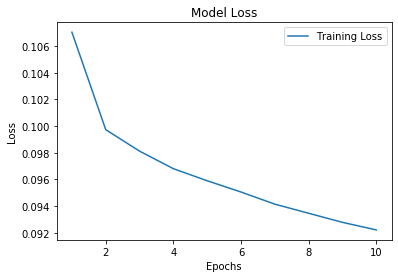

In [100]:
loss_values = history_model2.history['loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [101]:
test_loss, test_acc = model2.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.0914 - accuracy: 0.6940


In [102]:
print(f'Model2 Accuracy: {test_acc}')
print(f'Model2 Loss:     {test_loss}')

Model2 Accuracy: 0.6940000057220459
Model2 Loss:     0.09138676524162292


### Confusion Matrix:

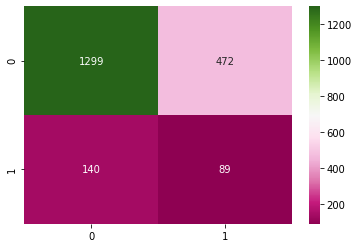

In [103]:
y_pred_model2 = model2.predict(X_test)
y_pred_model2 = np.argmax(y_pred_model2, axis=1)
cm_model2 = confusion_matrix(y_test, y_pred_model2)
sns.heatmap(cm_model2, annot=True, cmap="PiYG", fmt='g')

### Results:

The visualization for the model accuracy for each epoch displays that the accuracy for the model incremented significantly for each epoch. The model loss dropped slowly in the beginning and then it dropped steadily for other epochs.
From the confusion matrix, it can be seen that the model performed fairly in predicting true positives as well as true negatives.

## Model 3:
In the below model, nine layered sequential densely-connected deep neural network model is implemented with a combination of softsign, elu, and sigmoid activation functions. The layer units of the model were selected a bit differently from the previous two models. The layers are arranged to start with 50 units for the first two layers then reduced to 40 units for the next layer and again to 30 units for the next two layers. After then the layers were increased again to 40 units for the next layer and again incremented to 50 units for the other two layers. The model was structured like a deep convolutional inverse graphic network where the layers start with more layers then reduces and again increases. This structure was selected for experimentation to understand how the model performs when the units are incremented and decremented for different layers and different activation functions are applied to the model.

In [104]:
model3 = Sequential([
    Dense(50, input_shape=(X_train.shape[1],),activation=tf.nn.softsign, name="layer1"),
    Dense(50, activation=tf.nn.softsign, name="layer2"),
    Dense(40, activation=tf.nn.softsign, name="layer3"),
    Dense(30, activation=tf.nn.elu,      name="layer4"),
    Dense(30, activation=tf.nn.elu,      name="layer5"),
    Dense(40, activation=tf.nn.softsign, name="layer6"),
    Dense(50, activation=tf.nn.softsign, name="layer7"),
    Dense(50, activation=tf.nn.softsign, name="layer8"),
    Dense(2,  activation=tf.nn.sigmoid,  name="layer9"),
])

In [105]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 50)                1100      
_________________________________________________________________
layer2 (Dense)               (None, 50)                2550      
_________________________________________________________________
layer3 (Dense)               (None, 40)                2040      
_________________________________________________________________
layer4 (Dense)               (None, 30)                1230      
_________________________________________________________________
layer5 (Dense)               (None, 30)                930       
_________________________________________________________________
layer6 (Dense)               (None, 40)                1240      
_________________________________________________________________
layer7 (Dense)               (None, 50)               

In [106]:
model3.compile(optimizer='sgd',
               loss='mean_squared_error',
               metrics=['accuracy'])

In [107]:
%%time
history_model3 = model3.fit(X_train, y_train, epochs=10)

Epoch 1/10
250/250 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.1971
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.1149 - accuracy: 0.1842
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.1070 - accuracy: 0.1914
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.1047 - accuracy: 0.2100
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.1038 - accuracy: 0.2465
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.1034 - accuracy: 0.2797
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.1032 - accuracy: 0.3130
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.1031 - accuracy: 0.3429
Epoch 9/10
250/250 [==============================] - 0s 2ms/step - loss: 0.1030 - accuracy: 0.3817
Epoch 10/10
250/250 [==============================] - 1s 2ms/step - loss: 0.1029 - accuracy: 0.4146

### Model accuracy:

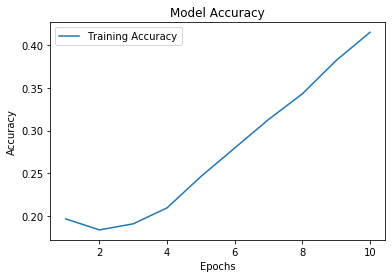

In [108]:
accuray_values = history_model3.history['accuracy']
epochs = range(1, len(accuray_values)+1)

plt.plot(epochs, accuray_values, label='Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

### Model loss:

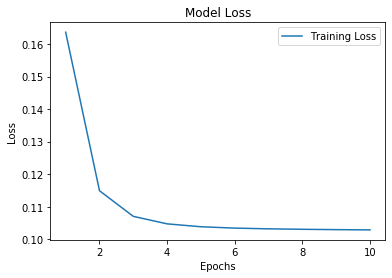

In [109]:
loss_values = history_model3.history['loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [110]:
test_loss, test_acc = model3.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.1009 - accuracy: 0.4615


In [111]:
print(f'Model3 Accuracy: {test_acc}')
print(f'Model3 Loss:     {test_loss}')

Model3 Accuracy: 0.46149998903274536
Model3 Loss:     0.10094005614519119


### Confusion matrix:

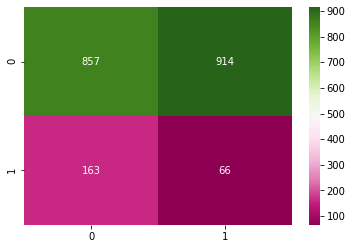

In [112]:
y_pred_model3 = model3.predict(X_test)
y_pred_model3 = np.argmax(y_pred_model3, axis=1)
cm_model3 = confusion_matrix(y_test, y_pred_model3)
sns.heatmap(cm_model3, annot=True, cmap="PiYG", fmt='g')

### Results:

The visualization for the model accuracy for each epoch displays that the accuracy for the model incremented slowly for each epoch. The model loss dropped sequentially for each epoch.
From the confusion matrix, it can be seen that the model performed well in predicting true positives but performed fairly for the true negatives.

# Conclusions

In this assignment, I have learned how to construct and implement deep neural networks using the TensorFlow library. From the results, it can be seen that the third model had the highest accuracy when compared to the other two. Implementing different neural network models helped me to gain a better understanding of experimenting with different hyper-parameters and analyzing the performance of the models on the classification dataset. This assignment was the most interesting one where I was able to learn and explore different API's available in TensorFlow for constructing different types of neural networks.

<img src="https://camo.githubusercontent.com/31e20172e3b7bc5530a6e7c7e7339e8e556d0acc/687474703a2f2f7777772e6173696d6f76696e737469747574652e6f72672f77702d636f6e74656e742f75706c6f6164732f323031362f30392f6e657572616c6e6574776f726b732e706e67" width=700 />

